<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%208.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
pip install scikit-fuzzy

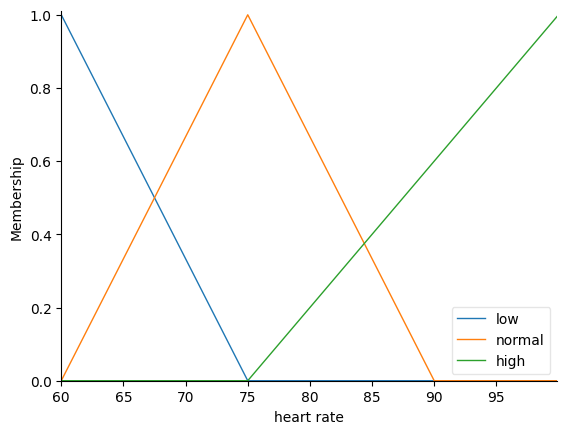

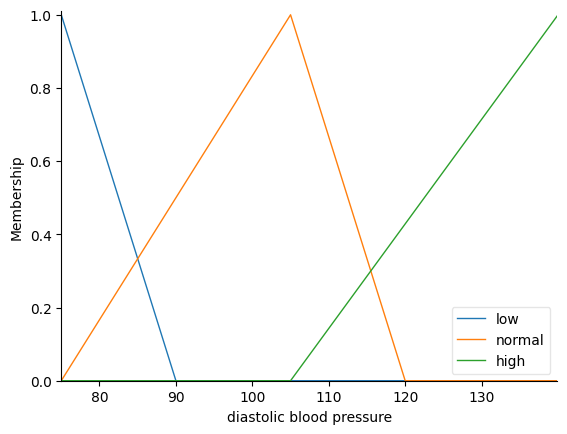

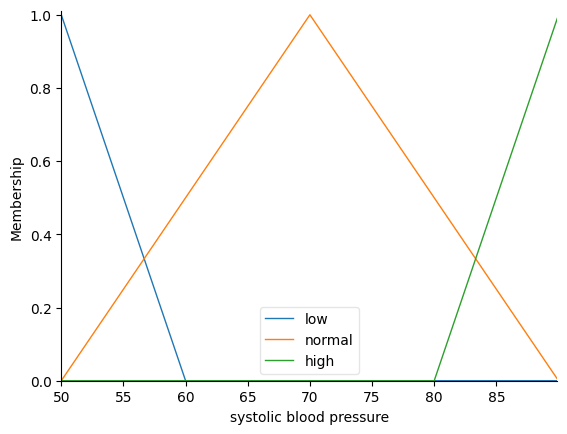

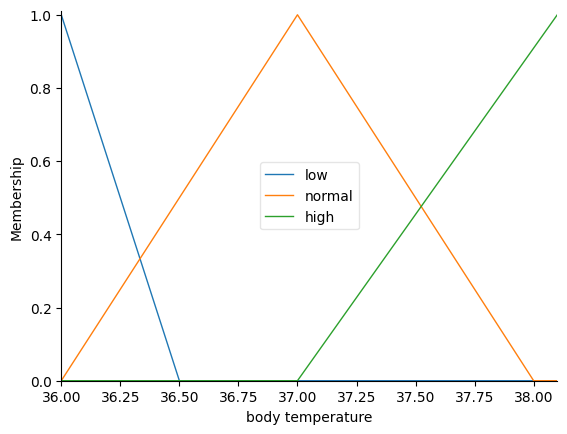

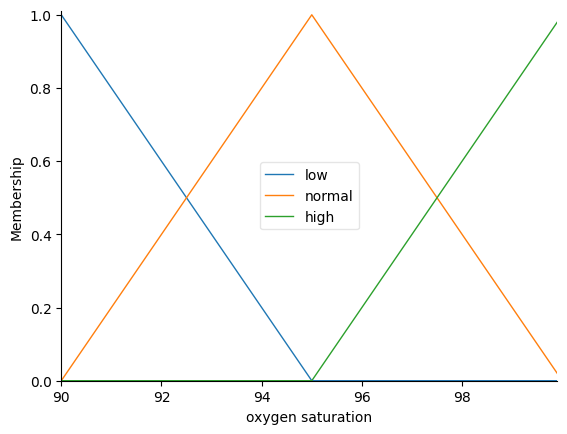

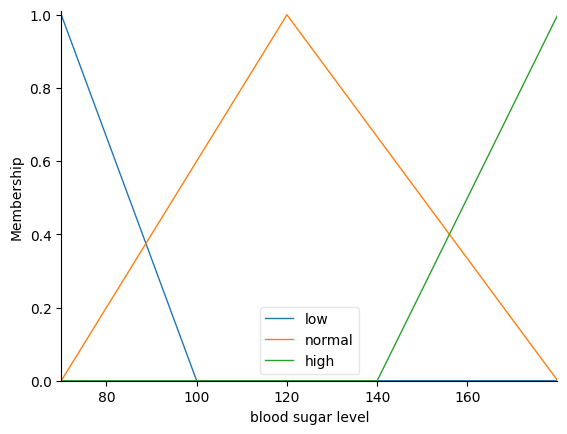

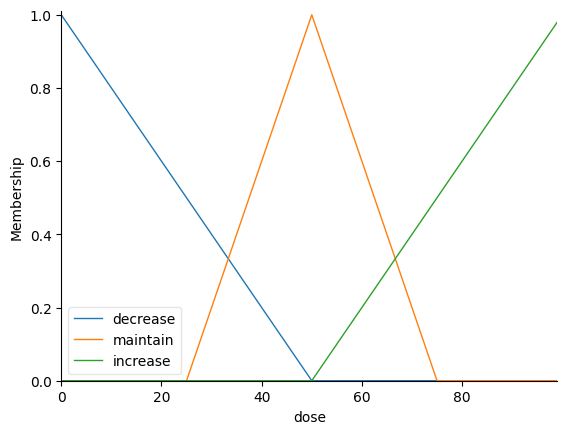

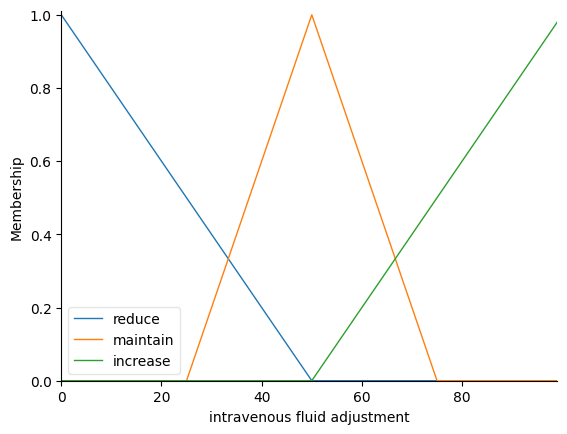

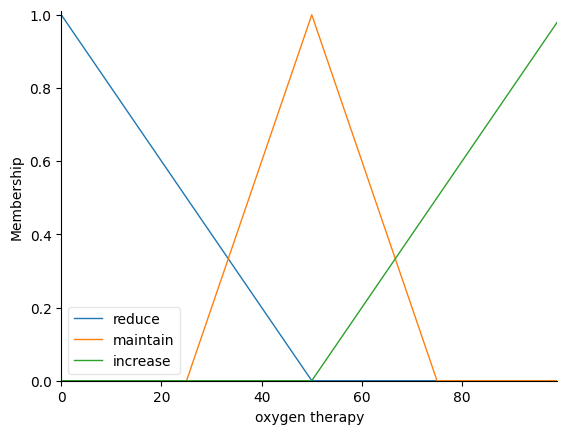

In [25]:
#exam 7


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


heart_rate=ctrl.Antecedent(np.arange(60,100,0.1),'heart rate')
diastolic_pressure=ctrl.Antecedent(np.arange(75,140,0.1),'diastolic blood pressure')
systolic_pressure=ctrl.Antecedent(np.arange(50,90,0.1),'systolic blood pressure')
temperature=ctrl.Antecedent(np.arange(36,38.1,0.01),'body temperature')
oxygen_saturation=ctrl.Antecedent(np.arange(90,100,0.1),'oxygen saturation')
sugar_level=ctrl.Antecedent(np.arange(70,180,0.1),'blood sugar level')
dose=ctrl.Consequent(np.arange(0,100,1),'dose')
adjust=ctrl.Consequent(np.arange(0,100,1),'intravenous fluid adjustment')
therapy=ctrl.Consequent(np.arange(0,100,1),'oxygen therapy')




heart_rate['low']=fuzz.trimf(heart_rate.universe,[60,60,75])
heart_rate['normal']=fuzz.trimf(heart_rate.universe,[60,75,90])
heart_rate['high']=fuzz.trimf(heart_rate.universe,[75,100,100])
diastolic_pressure['low']=fuzz.trimf(diastolic_pressure.universe,[75,75,90])
diastolic_pressure['normal']=fuzz.trimf(diastolic_pressure.universe,[75,105,120])
diastolic_pressure['high']=fuzz.trimf(diastolic_pressure.universe,[105,140,140])
systolic_pressure['low']=fuzz.trimf(systolic_pressure.universe,[50,50,60])
systolic_pressure['normal']=fuzz.trimf(systolic_pressure.universe,[50,70,90])
systolic_pressure['high']=fuzz.trimf(systolic_pressure.universe,[80,90,90])
temperature['low']=fuzz.trimf(temperature.universe,[36,36,36.5])
temperature['normal']=fuzz.trimf(temperature.universe,[36,37,38])
temperature['high']=fuzz.trimf(temperature.universe,[37,38.1,38.1])
oxygen_saturation['low']=fuzz.trimf(oxygen_saturation.universe,[90,90,95])
oxygen_saturation['normal']=fuzz.trimf(oxygen_saturation.universe,[90,95,100])
oxygen_saturation['high']=fuzz.trimf(oxygen_saturation.universe,[95,100,100])
sugar_level['low']=fuzz.trimf(sugar_level.universe,[70,70,100])
sugar_level['normal']=fuzz.trimf(sugar_level.universe,[70,120,180])
sugar_level['high']=fuzz.trimf(sugar_level.universe,[140,180,180])
dose['decrease']=fuzz.trimf(dose.universe,[0,0,50])
dose['maintain']=fuzz.trimf(dose.universe,[25,50,75])
dose['increase']=fuzz.trimf(dose.universe,[50,100,100])
adjust['reduce']=fuzz.trimf(adjust.universe,[0,0,50])
adjust['maintain']=fuzz.trimf(adjust.universe,[25,50,75])
adjust['increase']=fuzz.trimf(adjust.universe,[50,100,100])
therapy['reduce']=fuzz.trimf(therapy.universe,[0,0,50])
therapy['maintain']=fuzz.trimf(therapy.universe,[25,50,75])
therapy['increase']=fuzz.trimf(therapy.universe,[50,100,100])



heart_rate.view()
diastolic_pressure.view()
systolic_pressure.view()
temperature.view()
oxygen_saturation.view()
sugar_level.view()
dose.view()
adjust.view()
therapy.view()





66.29073243647234
49.99999999999999
50.00000000000206


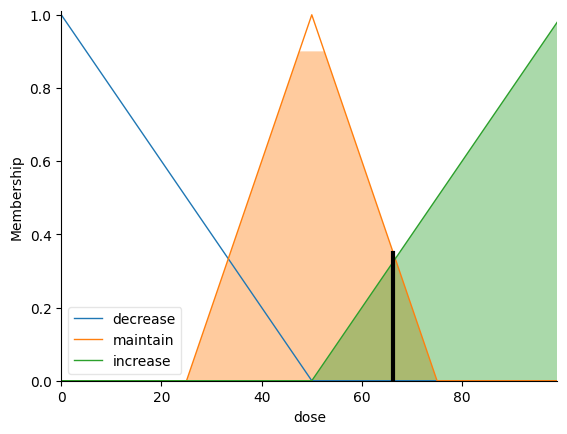

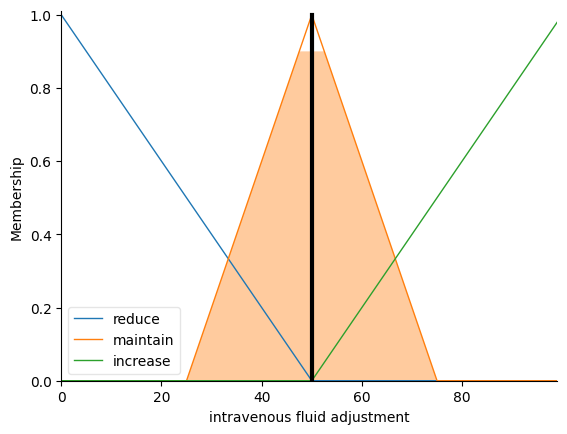

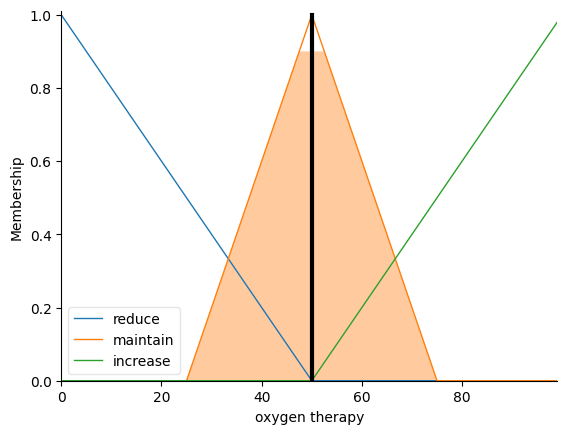

In [26]:
rule1=ctrl.Rule(heart_rate['low']&diastolic_pressure['low']&systolic_pressure['low'],(adjust['increase'],dose['increase']))
rule2=ctrl.Rule(heart_rate['high']&diastolic_pressure['high']&systolic_pressure['high'],(dose['decrease']))
rule3=ctrl.Rule(heart_rate['normal']&diastolic_pressure['normal']&systolic_pressure['normal'],(dose['maintain']))
rule4=ctrl.Rule(temperature['high']&oxygen_saturation['low'],(therapy['increase'],dose['increase']))
rule5=ctrl.Rule(temperature['normal']&oxygen_saturation['normal'],(dose['maintain'],adjust['maintain'],therapy['maintain']))
rule6=ctrl.Rule(temperature['low']&oxygen_saturation['low'],(therapy['increase'],adjust['maintain']))
rule7=ctrl.Rule(sugar_level['high'],(dose['increase']))
rule8=ctrl.Rule(sugar_level['low'],(dose['decrease']))
rule9=ctrl.Rule(sugar_level['normal'],(dose['maintain']))
rule10=ctrl.Rule(diastolic_pressure['high']&systolic_pressure['high']&sugar_level['high']&heart_rate['high'],(dose['decrease']))
rule11=ctrl.Rule(diastolic_pressure['low']&systolic_pressure['low']&oxygen_saturation['low']&heart_rate['low'],(adjust['increase'],therapy['increase'],dose['increase']))
rule12=ctrl.Rule(temperature['high']&diastolic_pressure['high']&systolic_pressure['high']&oxygen_saturation['normal'],(dose['increase'],therapy['increase']))



dose_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
dose_simulation=ctrl.ControlSystemSimulation(dose_ctrl)
dose_simulation.input['heart rate']=75
dose_simulation.input['diastolic blood pressure']=100
dose_simulation.input['systolic blood pressure']=90
dose_simulation.input['body temperature']=37.1
dose_simulation.input['oxygen saturation']=95
dose_simulation.input['blood sugar level']=450
dose_simulation.compute()
print(dose_simulation.output['dose'])
print(dose_simulation.output['intravenous fluid adjustment'])
print(dose_simulation.output['oxygen therapy'])
dose.view(sim=dose_simulation)
adjust.view(sim=dose_simulation)
therapy.view(sim=dose_simulation)

